<a href="https://colab.research.google.com/github/NicolLoaiza1/SIS-420-Laboratorio-09/blob/main/Laboratorio_09_Loaiza_Alvarez_Nicol_Noelia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Loaiza Alvarez Nicol Noelia

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

In [25]:
data = pd.read_csv(('/content/drive/MyDrive/SIS 420 Dataset/Dataset.csv'),delimiter=',')
data = np.array(data)
X = data[:, :21]
y = data[:, 21]
m = y.size

# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*45)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
---------------------------------------------
     120       0         2
     132       0         1
     133       0         1
     134       0         1
     132       0         1
     134       0         3
     134       0         3
     122       0         3
     122       0         3
     122       0         3


In [26]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [27]:
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('-'*45)
print('Media calculada:', mu)
print('-'*45)
print('Desviación estandar calculada:', sigma)
print('-'*45)
print(X_norm)

[[1.20e+02 0.00e+00 0.00e+00 ... 1.21e+02 7.30e+01 1.00e+00]
 [1.32e+02 6.00e-03 0.00e+00 ... 1.40e+02 1.20e+01 0.00e+00]
 [1.33e+02 3.00e-03 0.00e+00 ... 1.38e+02 1.30e+01 0.00e+00]
 ...
 [1.40e+02 1.00e-03 0.00e+00 ... 1.52e+02 4.00e+00 1.00e+00]
 [1.40e+02 1.00e-03 0.00e+00 ... 1.51e+02 4.00e+00 1.00e+00]
 [1.42e+02 2.00e-03 2.00e-03 ... 1.45e+02 1.00e+00 0.00e+00]]
---------------------------------------------
Media calculada: [1.33303857e+02 3.17826905e-03 9.48071496e-03 4.36641580e-03
 1.88946378e-03 3.29256820e-06 1.58513641e-04 4.69901223e+01
 1.33278457e+00 9.84666040e+00 8.18762935e+00 7.04459078e+01
 9.35794920e+01 1.64025400e+02 4.06820320e+00 3.23612418e-01
 1.37452023e+02 1.34610536e+02 1.38090310e+02 1.88080903e+01
 3.20319849e-01]
---------------------------------------------
Desviación estandar calculada: [9.83852958e+00 3.86468172e-03 4.66548681e-02 2.94537618e-03
 2.95951230e-03 5.72863614e-05 5.89808754e-04 1.71887698e+01
 8.83033586e-01 1.83925525e+01 5.62692278e+0

In [28]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [29]:
print(X)

[[ 1.         -1.35222005 -0.8223883  ... -1.18164215  1.87056871
   1.11298001]
 [ 1.         -0.1325256   0.73013282 ...  0.13203796 -0.23499819
  -0.52452553]
 [ 1.         -0.03088439 -0.04612774 ... -0.00624416 -0.2004807
  -0.52452553]
 ...
 [ 1.          0.68060404 -0.56363478 ...  0.96173066 -0.51113811
   1.11298001]
 [ 1.          0.68060404 -0.56363478 ...  0.8925896  -0.51113811
   1.11298001]
 [ 1.          0.88388645 -0.30488126 ...  0.47774325 -0.61469058
  -0.52452553]]


In [30]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]  
    J = 0 
    h = np.dot(X, theta)  
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y)) 
    return J

In [31]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0] 
    theta = theta.copy()  
    J_history = []   
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))  
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 1.30432738e+00  1.46244846e-01 -1.18021185e-03  3.76816638e-03
 -6.73017786e-02 -9.10377401e-03  4.37642545e-02  2.16118486e-01
  1.47080881e-01  9.88985437e-04  2.16008583e-01  3.30697387e-02
 -2.21234424e-02  7.48923168e-02  7.53446810e-02 -8.77691529e-03
  8.63562761e-03 -6.97534636e-02 -6.36862014e-02 -1.35597548e-01
  7.98906757e-02  4.80331996e-02]
Clasificación de salud fetal (usando el descenso por el gradiente): $2


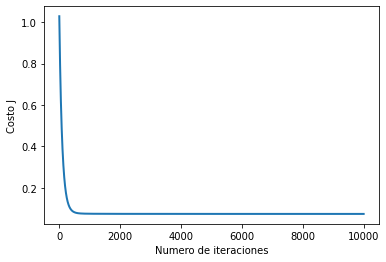

In [34]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.005
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(22)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1, 120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0]
X_array[1:22] = (X_array[1:22] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('Clasificación de salud fetal (usando el descenso por el gradiente): ${:.0f}'.format(price))

In [35]:
X_array = [1, 120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0]
X_array[1:22] = (X_array[1:22] - mu) / sigma

In [36]:
X_array[1:22]

[-1.3522200546092362,
 -0.8223883042718209,
 -0.20320955423320786,
 -1.4824645581771696,
 -0.6384375492921535,
 -0.05747560370484534,
 -0.2687543030278473,
 1.513190184100258,
 -0.943095013858353,
 1.8025415210983173,
 -1.028560294724384,
 -0.16550660055894836,
 -1.0685620700101375,
 -2.1195919412504174,
 -0.7013968475226328,
 -0.45844381526053474,
 -1.0656138330440816,
 0.1532697070913807,
 -1.1816421541317579,
 1.8705687107016409,
 1.1129800127196288]

In [37]:
data = pd.read_csv(('/content/drive/MyDrive/SIS 420 Dataset/Dataset.csv'),delimiter=',')
data = np.array(data)
X = data[:, :21]
y = data[:, 21]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [38]:
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)   
    return theta

In [39]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0]
price = np.dot(X_array, theta) 

print('Clasificación de salud fetal (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 1.44141761e+01 -1.09514694e-01  1.06940924e+02 -4.97560226e+01
 -3.63170325e+02  1.63646354e+02 -2.79908406e+03  5.62228446e+02
  1.58459673e-02  8.93314044e-01 -1.88550127e-03  1.26141423e-02
  5.29491036e-02  7.50682063e-02 -4.36182338e-02 -2.92627344e-03
  1.23867049e-02 -3.69826011e-03 -3.51443680e-03 -1.11969691e-02
  2.79296159e-03  8.24999215e-02]
Clasificación de salud fetal (usando la ecuación de la normal): $3
